## matplotlib.pyplot.barh

#### matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

Make a horizontal bar plot.

The bars are positioned at y with the given alignment. Their dimensions are given by width and height. The horizontal baseline is left (default 0).

Each of y, width, height, and left may either be a scalar applying to all bars, or it may be a sequence of length N providing a separate value for each bar.

Parameters:	
y : scalar or array-like
The y coordinates of the bars. See also align for the alignment of the bars to the coordinates.

width : scalar or array-like
The width(s) of the bars.

height : sequence of scalars, optional, default: 0.8
The heights of the bars.

left : sequence of scalars
The x coordinates of the left sides of the bars (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
Alignment of the base to the y coordinates*:

'center': Center the bars on the y positions.
'edge': Align the bottom edges of the bars with the y positions.
To align the bars on the top edge pass a negative height and align='edge'.

Returns:	
container : BarContainer
Container with all the bars and optionally errorbars.

Other Parameters:	
color : scalar or array-like, optional
The colors of the bar faces.

edgecolor : scalar or array-like, optional
The colors of the bar edges.

linewidth : scalar or array-like, optional
Width of the bar edge(s). If 0, don't draw edges.

tick_label : string or array-like, optional
The tick labels of the bars. Default: None (Use default numeric labels.)

xerr, yerr : scalar or array-like of shape(N,) or shape(2,N), optional
If not None, add horizontal / vertical errorbars to the bar tips. The values are +/- sizes relative to the data:

scalar: symmetric +/- values for all bars
shape(N,): symmetric +/- values for each bar
shape(2,N): Separate - and + values for each bar. First row
contains the lower errors, the second row contains the upper errors.
None: No errorbar. (default)
See Different ways of specifying error bars for an example on the usage of xerr and yerr.

ecolor : scalar or array-like, optional, default: 'black'
The line color of the errorbars.

capsize : scalar, optional
The length of the error bar caps in points. Default: None, which will take the value from rcParams["errorbar.capsize"].

error_kw : dict, optional
Dictionary of kwargs to be passed to the errorbar method. Values of ecolor or capsize defined here take precedence over the independent kwargs.

log : bool, optional, default: False
If True, set the x-axis to be log scale.

#### Discrete distribution as horizontal bar chart

Stacked bar charts can be used to visualize discrete distributions.

This example visualizes the result of a survey in which people could rate their agreement to questions on a five-element scale.

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cf94cb7c50>)

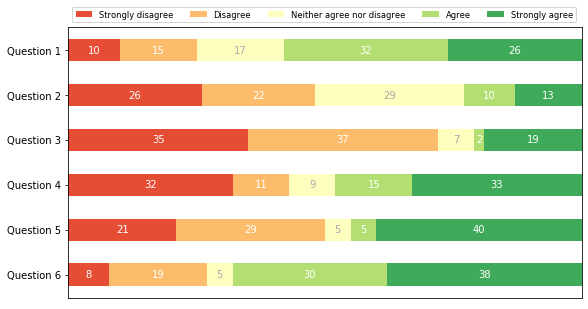

In [6]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)